# Lorenz System of Equations
The Lorenz system is a famous system of equations in the field of Non-linear Dynamics.The system was derived as a simplified model of convection rolls in the atmosphere and is notable for demonstrating chaos under certain parameter values. This project deals with how the behaviour of the Lorenz system changes as Rayleigh's number, r,  is varied. It was found that in the system, for $0<r<1$, the origin is globally stable and all trajectories approach it. Specifically for $0<r<1$, The origin is a stable node. For $r>1$, a symmetric pair of fixed points arise named $C^+$ and $C^-$ by convention. These fixed points become unstable limit cycles at $r = r_H = 24.05$ and the system becomes chaotic. As $r$ becomes very large, The system enters periodic windows whereby after given time to settle, the system repeats itself. The Lorenz Systems of Equations are given by:
$$\dot{x} = \sigma (  y-x   )$$
$$\dot{y} = rx - y - xz$$
$$\dot{z} = xy - bz$$

Where we keep $\sigma$ and $b$ fixed to $\sigma = 10$ and $b = \frac{8}{3}$

In [1]:
#ALL IMPORTS NEEDED#
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Gives the power of 3D
import numpy as np
from scipy.integrate import odeint #This imports the ODE integration function from scipy
from scipy.optimize import *

#CONSTANTS#
S = 10 #sigma
B = 8/3 #b

%config InlineBackend.figure_format ='retina' #Increases resolution of plots

In [19]:
def LorenzSolver(X, r, R, ts):
    """
    X is an array of your inital conditions
    r is the rayleigh number you're using
    R is the resolution of the plot (the length of your time linspace in LorenzSolver())
    ts is the time, from zero, that you want the system to go to.
    
    It returns the 3D trajectory of a Lorenz System as well as its timespan.
    """
    
    def lorenz(X, t, S, B, r): #This defines the Lorenz System
        x, y, z = X
        xDot = S*(y-x)
        yDot = r*x - y - x*z
        zDot = -B*z + x*y
        return xDot, yDot, zDot
    
    
    
    t = np.linspace(0, ts, R)
    f = odeint(lorenz, X, t,(S, B, r)) #The numerical integration of the system. Uses the Isoda function (from Fortran). The parameters are entered as follows: odeint(funtion of DEs, ICs, timespace, (array of other constants))
    x, y, z = f.T #x,y,z reads the rows, whereas odeint returns x, y, and z as columns. This is just a transpose to get the formatting right.
    return x,y,z,t # Returns a Tuple

In [76]:
def MultiPlotter(rs, filename):
    """
    A two dimentional plotter that plots 4 graphs, each with a different r-value, with 4 trajectories on each of them.
    This works nicely in the context of the project.
    
    rs is an array of all the different r values you'd like to analyse
    filename is the name of the image that will save.
    """
    
    IC = [ [0, 1, 1], [-1, 0, 1], [1, -1, 0], [1, 1, -1] ]
    sIC = ['(0,1,1)', '(-1,0,1)', '(1,-1,0)', '(1,1,-1)']
    R = 100000
    ts = 100
    Ts1 = [0]*4
    Ts2 = [0]*4 ##These 4 lines are just creating a list to store the 4 trajectories in
    Ts3 = [0]*4
    Ts4 = [0]*4
    
    for i in range(0, 4, 1):
        Ts1[i] = LorenzSolver(IC[i], rs[0], R, ts)
        Ts2[i] = LorenzSolver(IC[i], rs[1], R, ts)
        Ts3[i] = LorenzSolver(IC[i], rs[2], R, ts)
        Ts4[i] = LorenzSolver(IC[i], rs[3], R, ts)
        
    Tss = [Ts1, Ts2, Ts3, Ts4] # Master array containing all trajectories
    plt.figure(figsize = (20, 20))
    for i in range(0, 4, 1): #This sets up the subplots
        plt.subplot(2, 2, i+1)
        plt.xlabel('x')
        plt.ylabel('z')
        plt.title('x vs z for r='+ str(rs[i]))
        plt.grid()
        for j in range(0, 4, 1): #This plots the individual trajectories on each subplot
            plt.plot(Tss[i][j][0], Tss[i][j][2], label = sIC[j]) #Tss[i][j][0] refers to the x-coord of the trajectories 
            plt.legend()                                         #Tss[i][j][2] refers to the z-coord of the trajectories
        plt.savefig(filename)

In [92]:
def ThreeDPlot(X, r, R, ts, filename):
    """
    X is an array of your inital conditions
    r is the rayleigh number you're using
    R is the resolution of the plot (the length of your time linspace in LorenzSolver())
    ts is the time, from zero that you want the system to go to.
    filename is the name of the png you'll save for the plot
    
    This solves a system using the LorenzSolver() method and plots the trajectories on a 3D axis
    """

    T = LorenzSolver(X, r, R, ts) #T is the trajectory of the Lorenz System under the initial conditions and r value.
    fig = plt.figure(figsize = (15, 12))
    ax = fig.gca(projection = '3d') #generates the 3D plot
    ax.plot(T[0], T[1], T[2])
    plt.xlabel('x')
    plt.ylabel('y')
    ax.set_zlabel('z')
    plt.savefig(filename)
    plt.show()
    

## Question 1: $0<r<1$
It can be in the phase portrait that all trajectories flow toward the origin for all time. The origin is therefore globally stable, specifically a stable node.

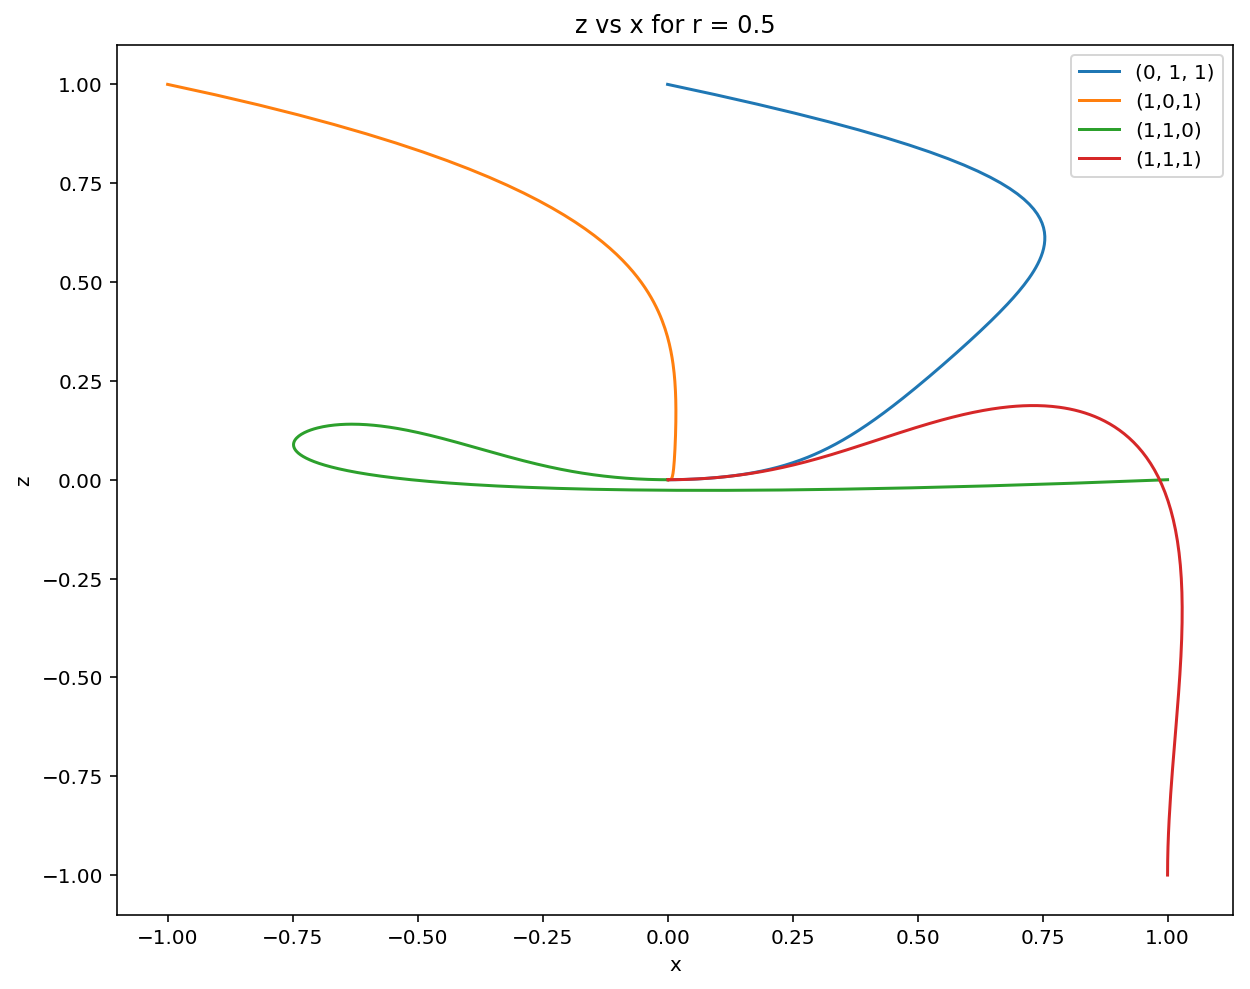

In [6]:
r = 0.5
IC = [ [0, 1, 1], [-1, 0, 1], [1, -1, 0], [1, 1, -1] ]
sIC = ['(0, 1, 1)', '(1,0,1)', '(1,1,0)', '(1,1,1)']
Ts = [0, 0, 0, 0] #list.append() did weird things to the data, this is more clear.

for i in range(0, len(IC), 1):
    Ts[i] = LorenzSolver(IC[i], r, 100000, 1000)

plt.figure(figsize=(10, 8))
plt.xlabel('x')
plt.ylabel('z')
plt.title('z vs x for r = 0.5')
for i in range(0, len(Ts), 1):
    plt.plot(Ts[i][0], Ts[i][2], label = sIC[i])
plt.legend()
plt.savefig("Question1.png")
plt.show()

## Question 2: $1<r<13.926$

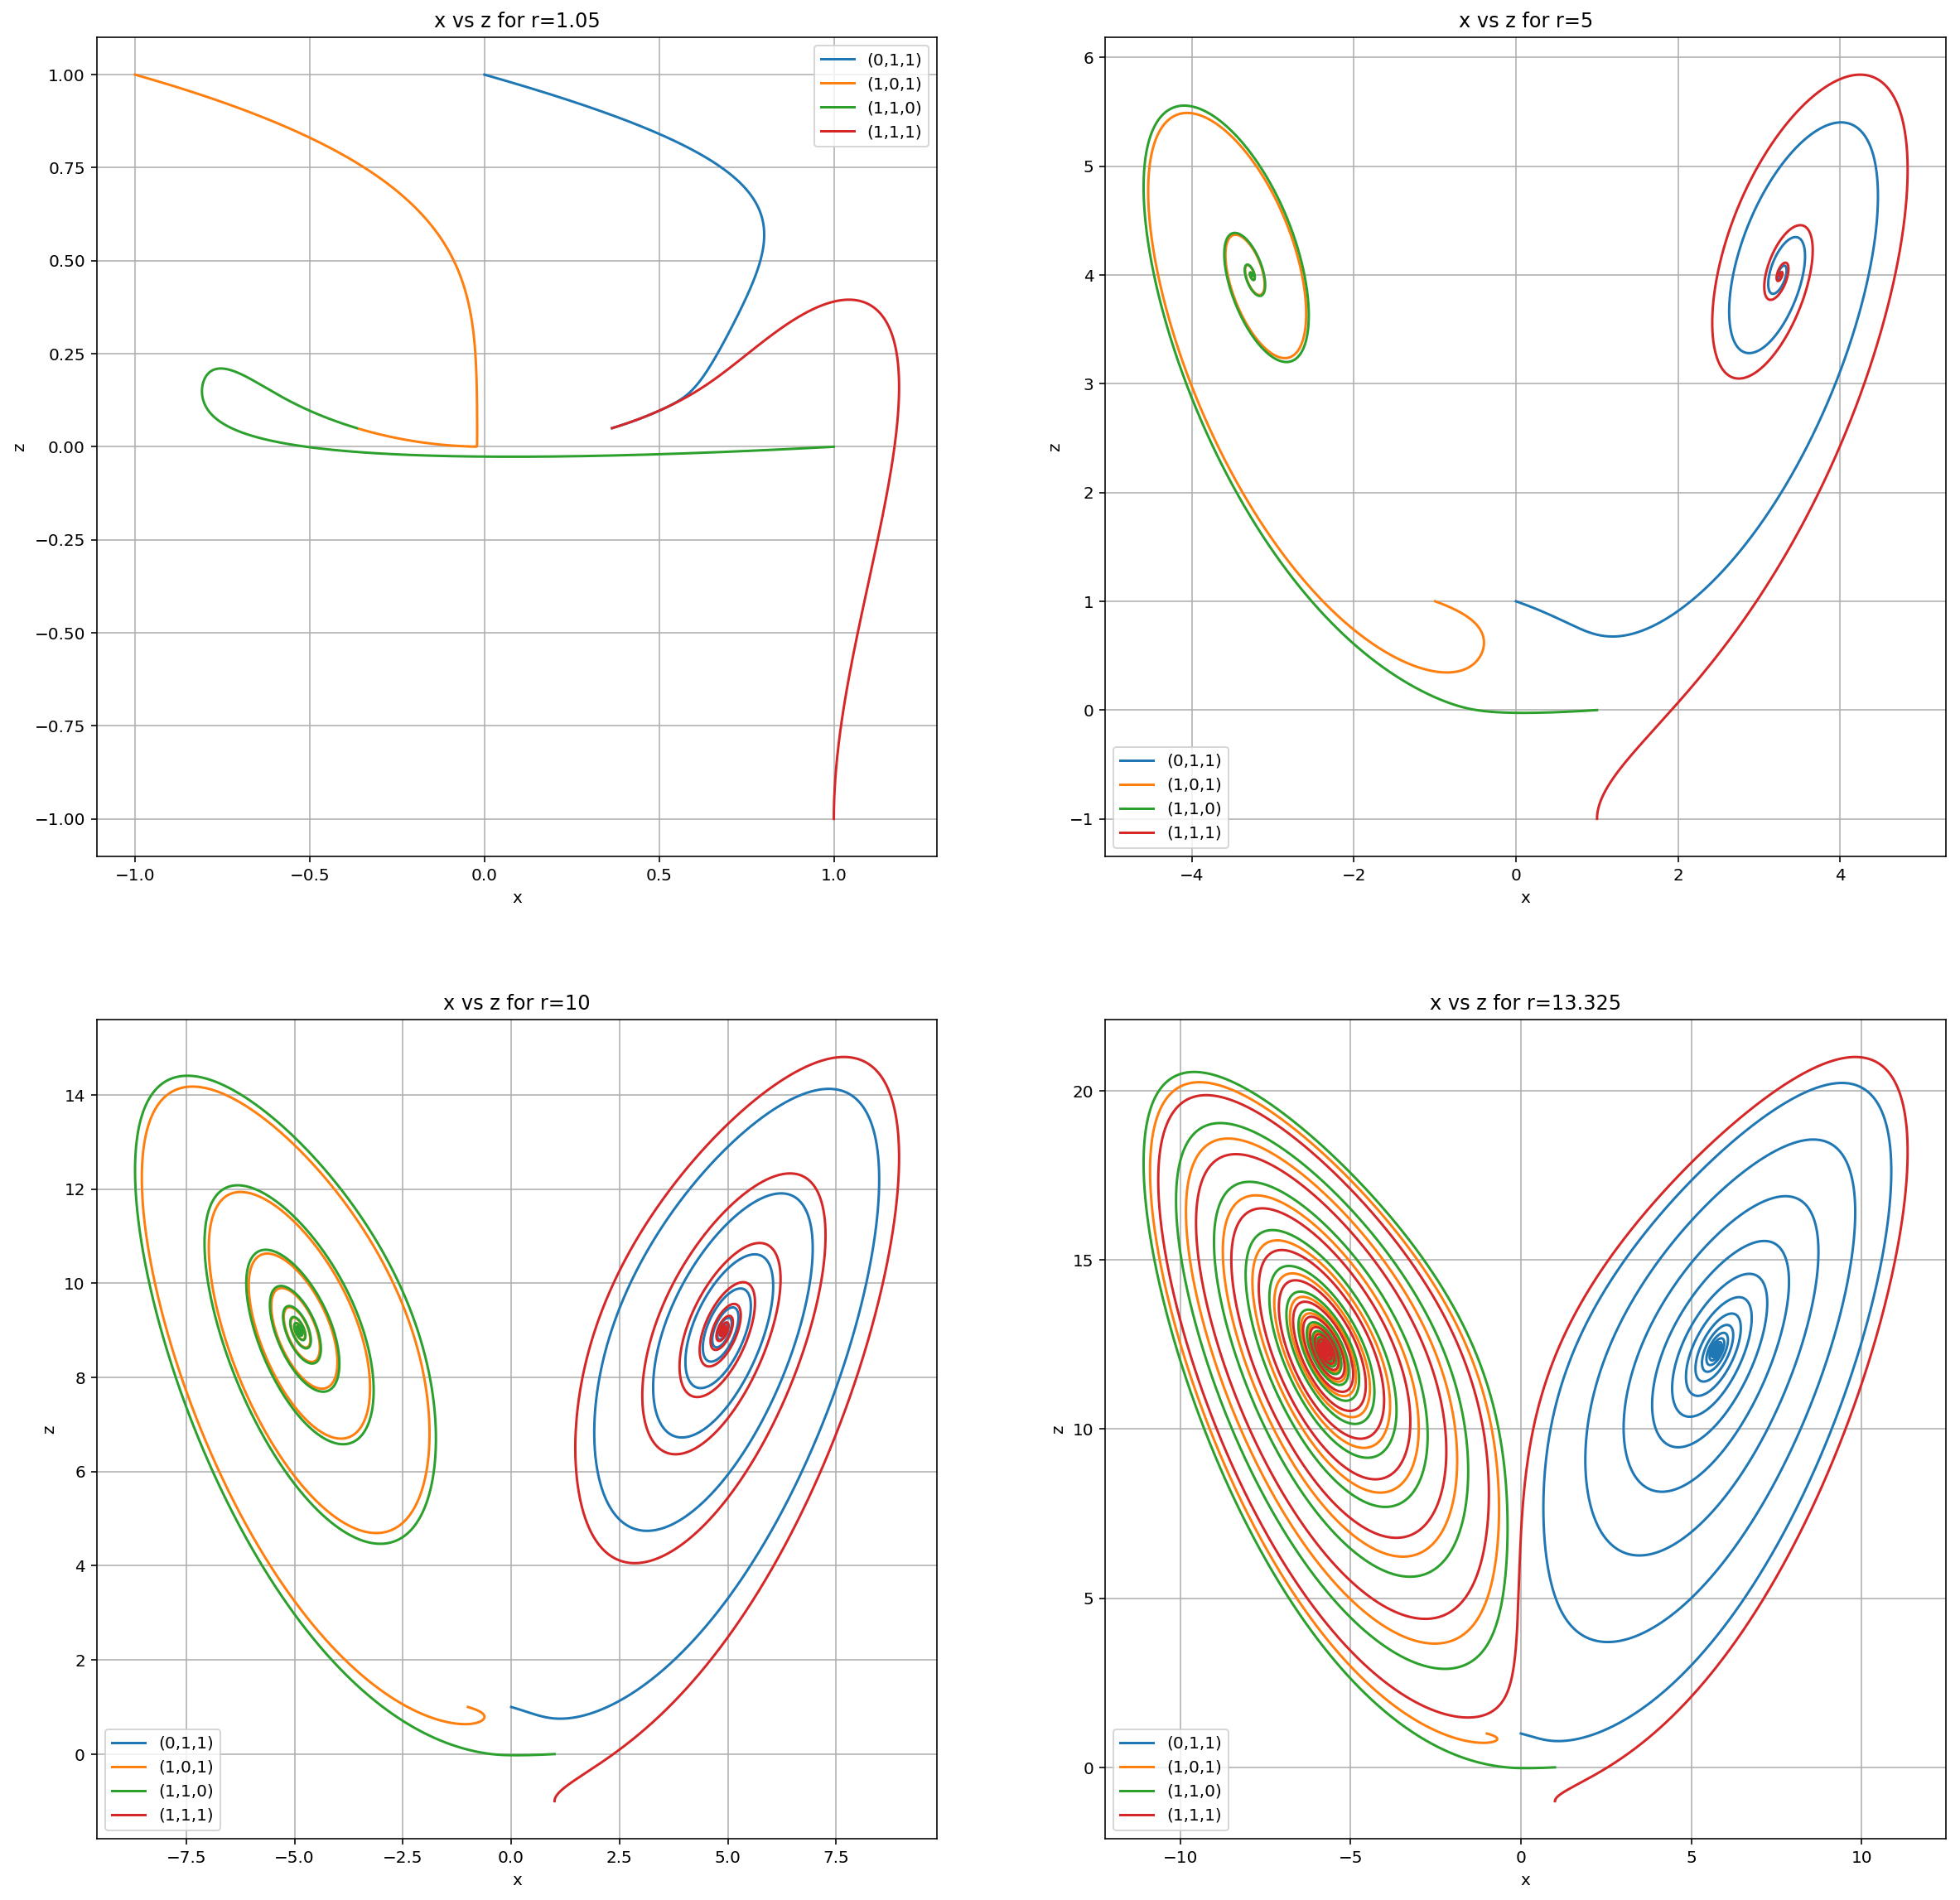

In [79]:
rs = [1.05, 5, 10, 13.325]
MultiPlotter(rs, "Question2.png")

For $r$ close to 1, the system behaves similarly to the case of $0<r<1$ except there is now a second fixed point that two of the trajectories flow to.<br>
In the case of $r = 5$, this is more apparent as it can be seen that the trajectories are attracted and spiral towards 2 fixed points, $C^+$ and $C^-$.<br>
as $r \rightarrow 13.325$, this behaviour continues with the radii of the spirals growing. When $r = 13.325$ it can be seen that one of the trajectories leap from one fixed point to another.

## Question 3: $13.9<r<24.06$

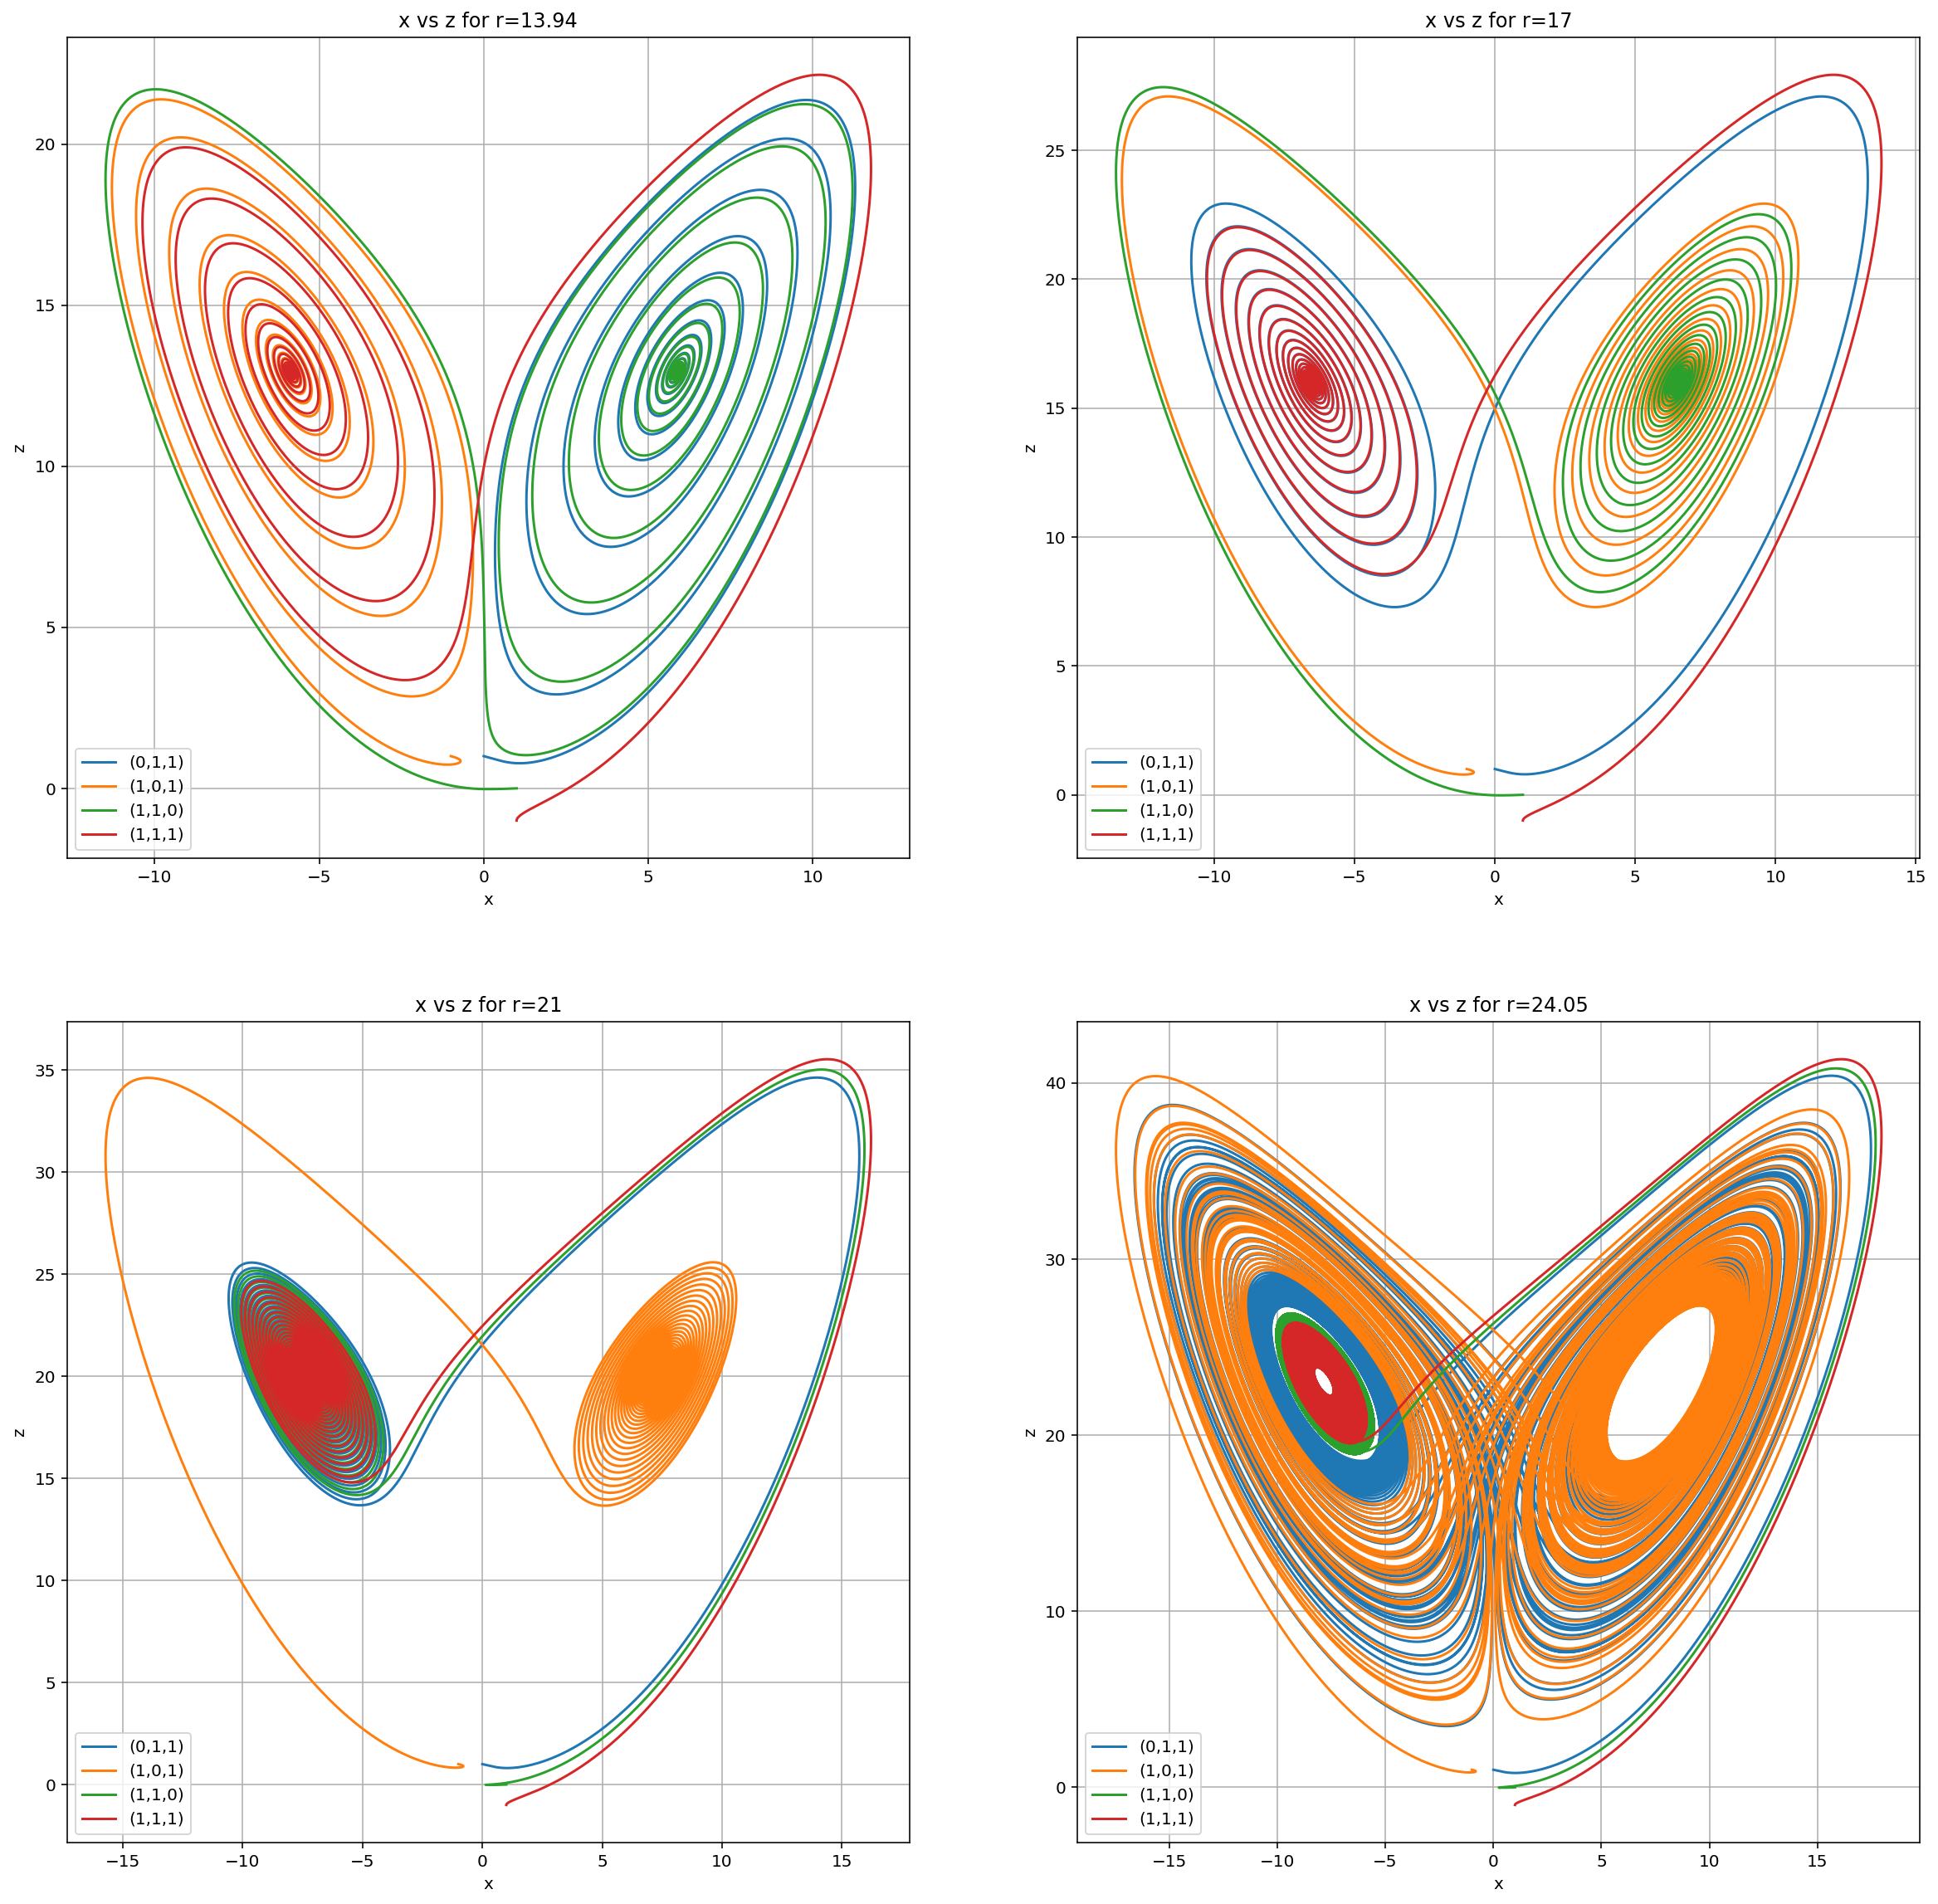

In [93]:
rs = [13.94, 17, 21, 24.05]
MultiPlotter(rs, "Question3.png")

For $13.9<r<24.06$, We see every trajectory jump across between the fixed points.

## Question 4: $24.06<r<24.74$

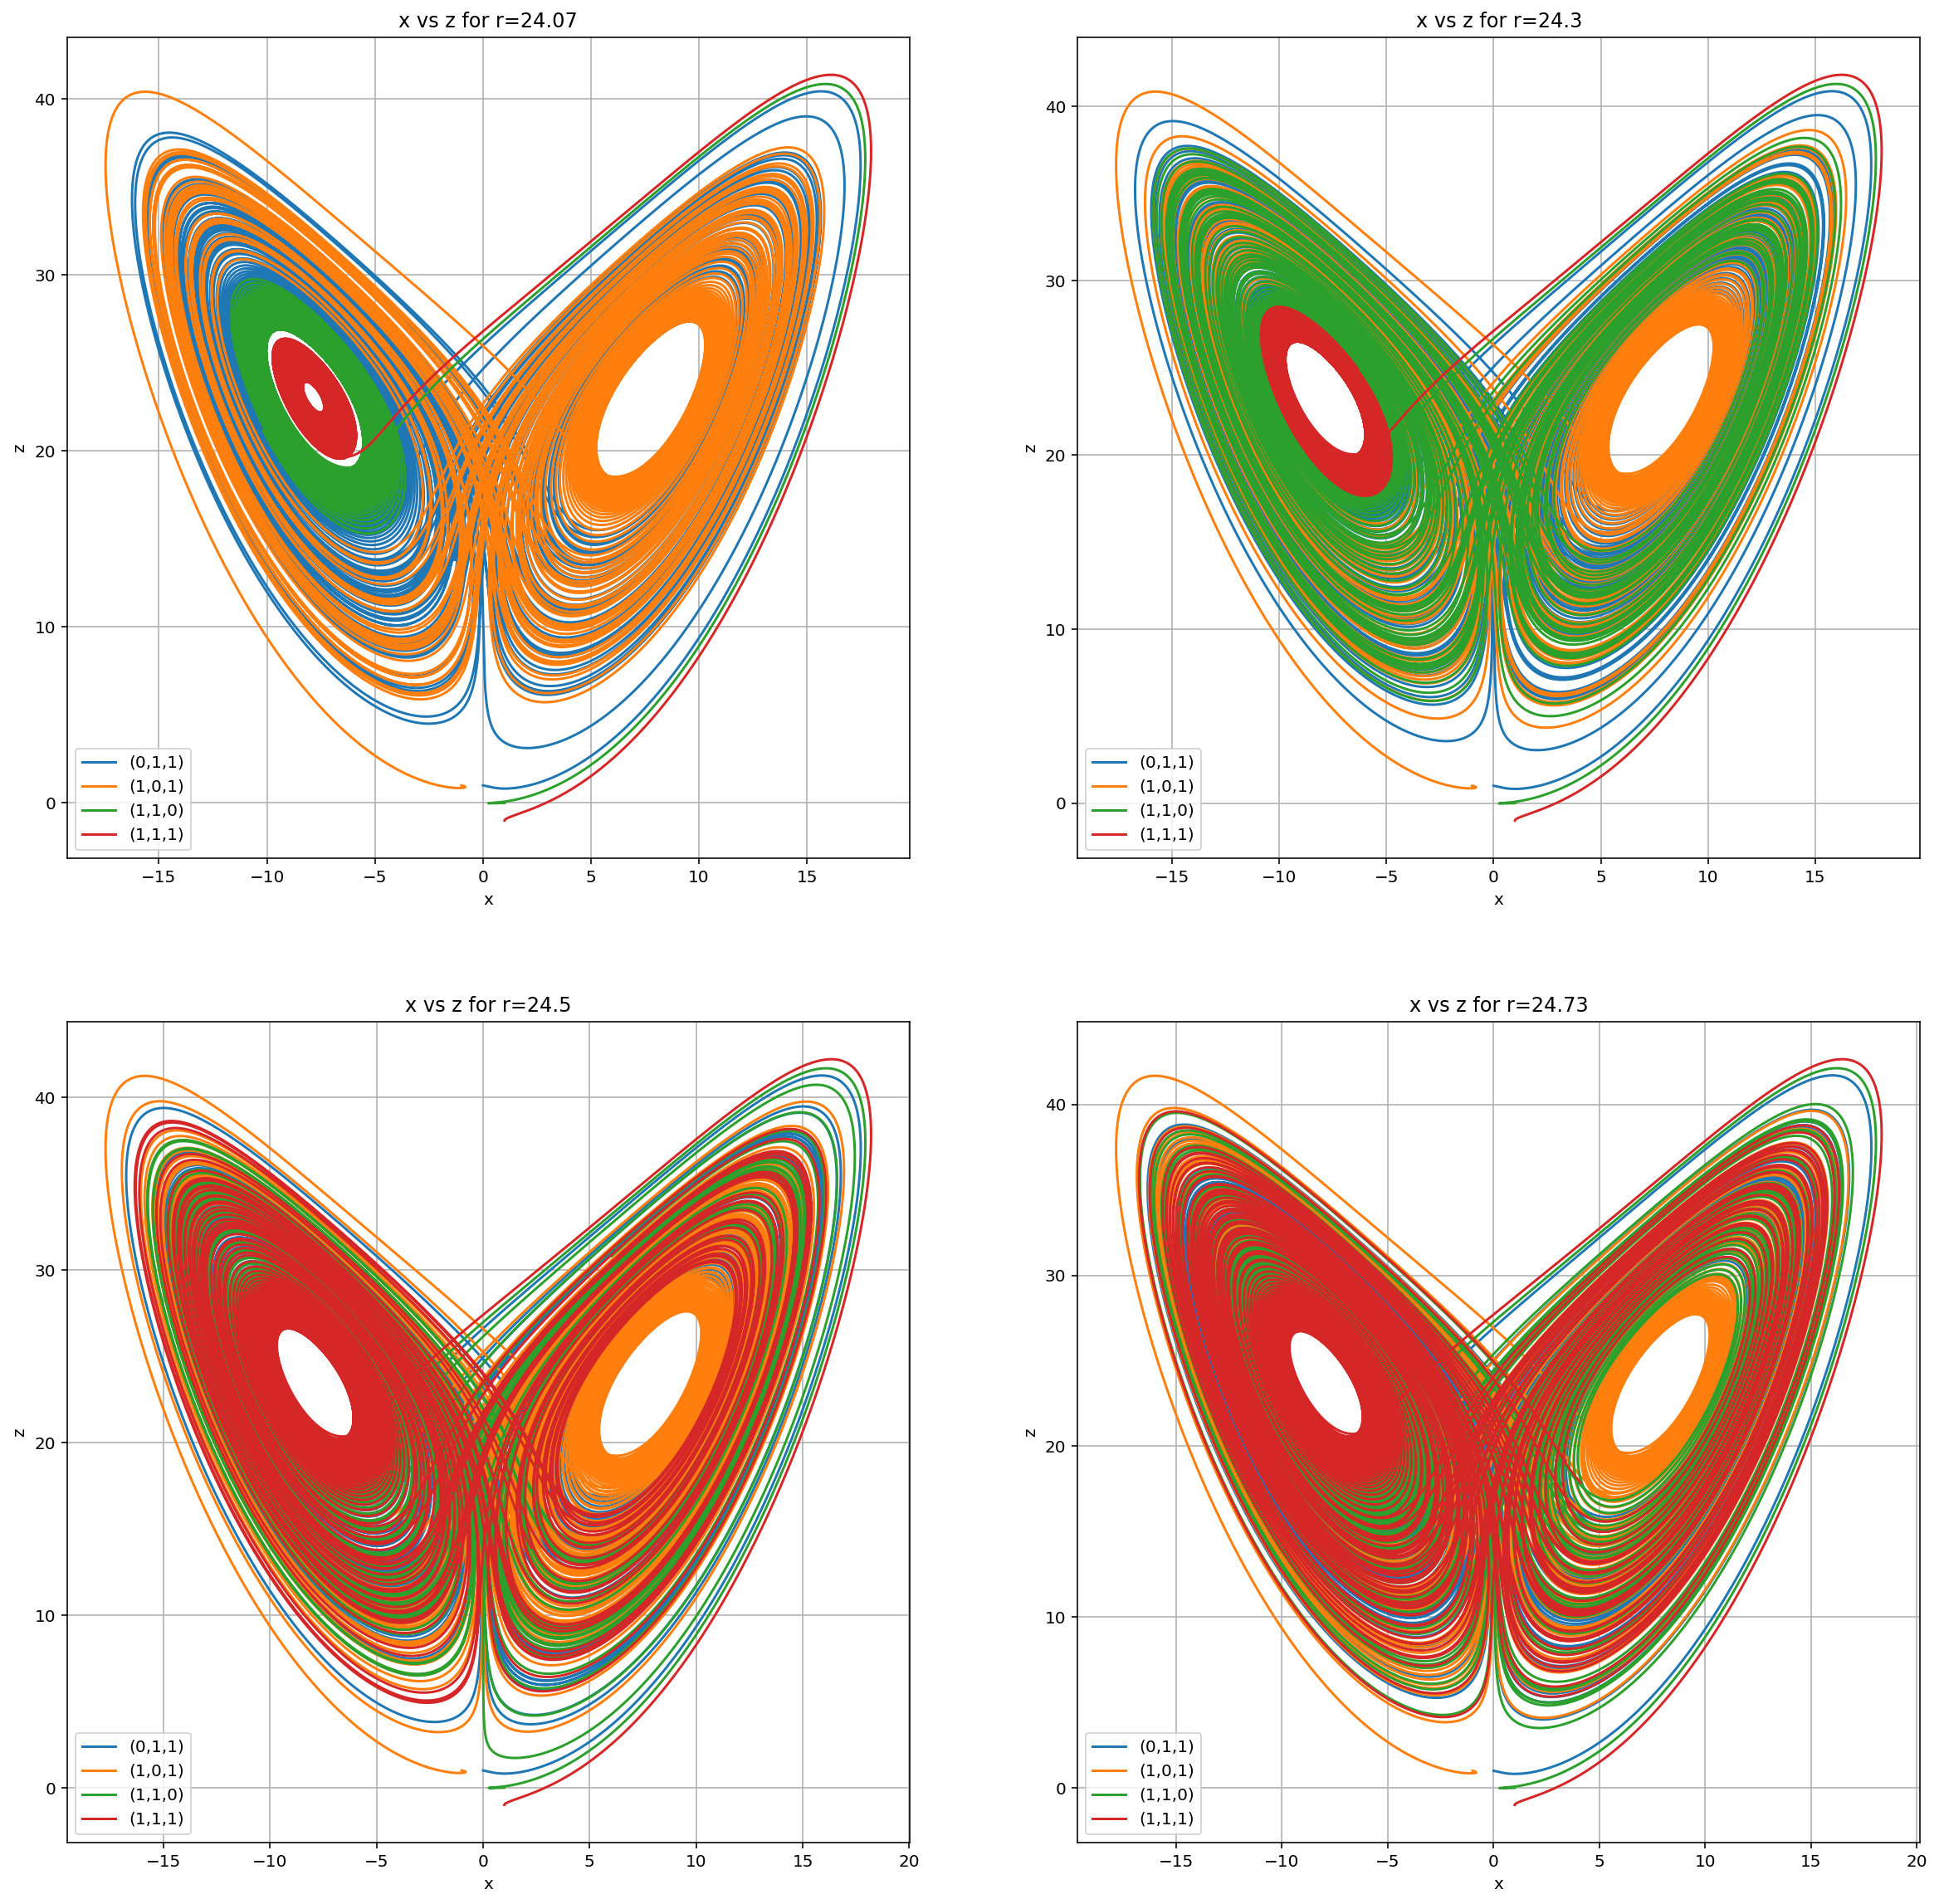

In [81]:
rs = [24.07, 24.3, 24.5, 24.73]
MultiPlotter(rs, "Question4.png")

In this range of $r$ values, we see that the trajectories behave chaotically switching between the two attractors.

## Question 5: 3D view of Lorenz attractor and its $y(t)$ series

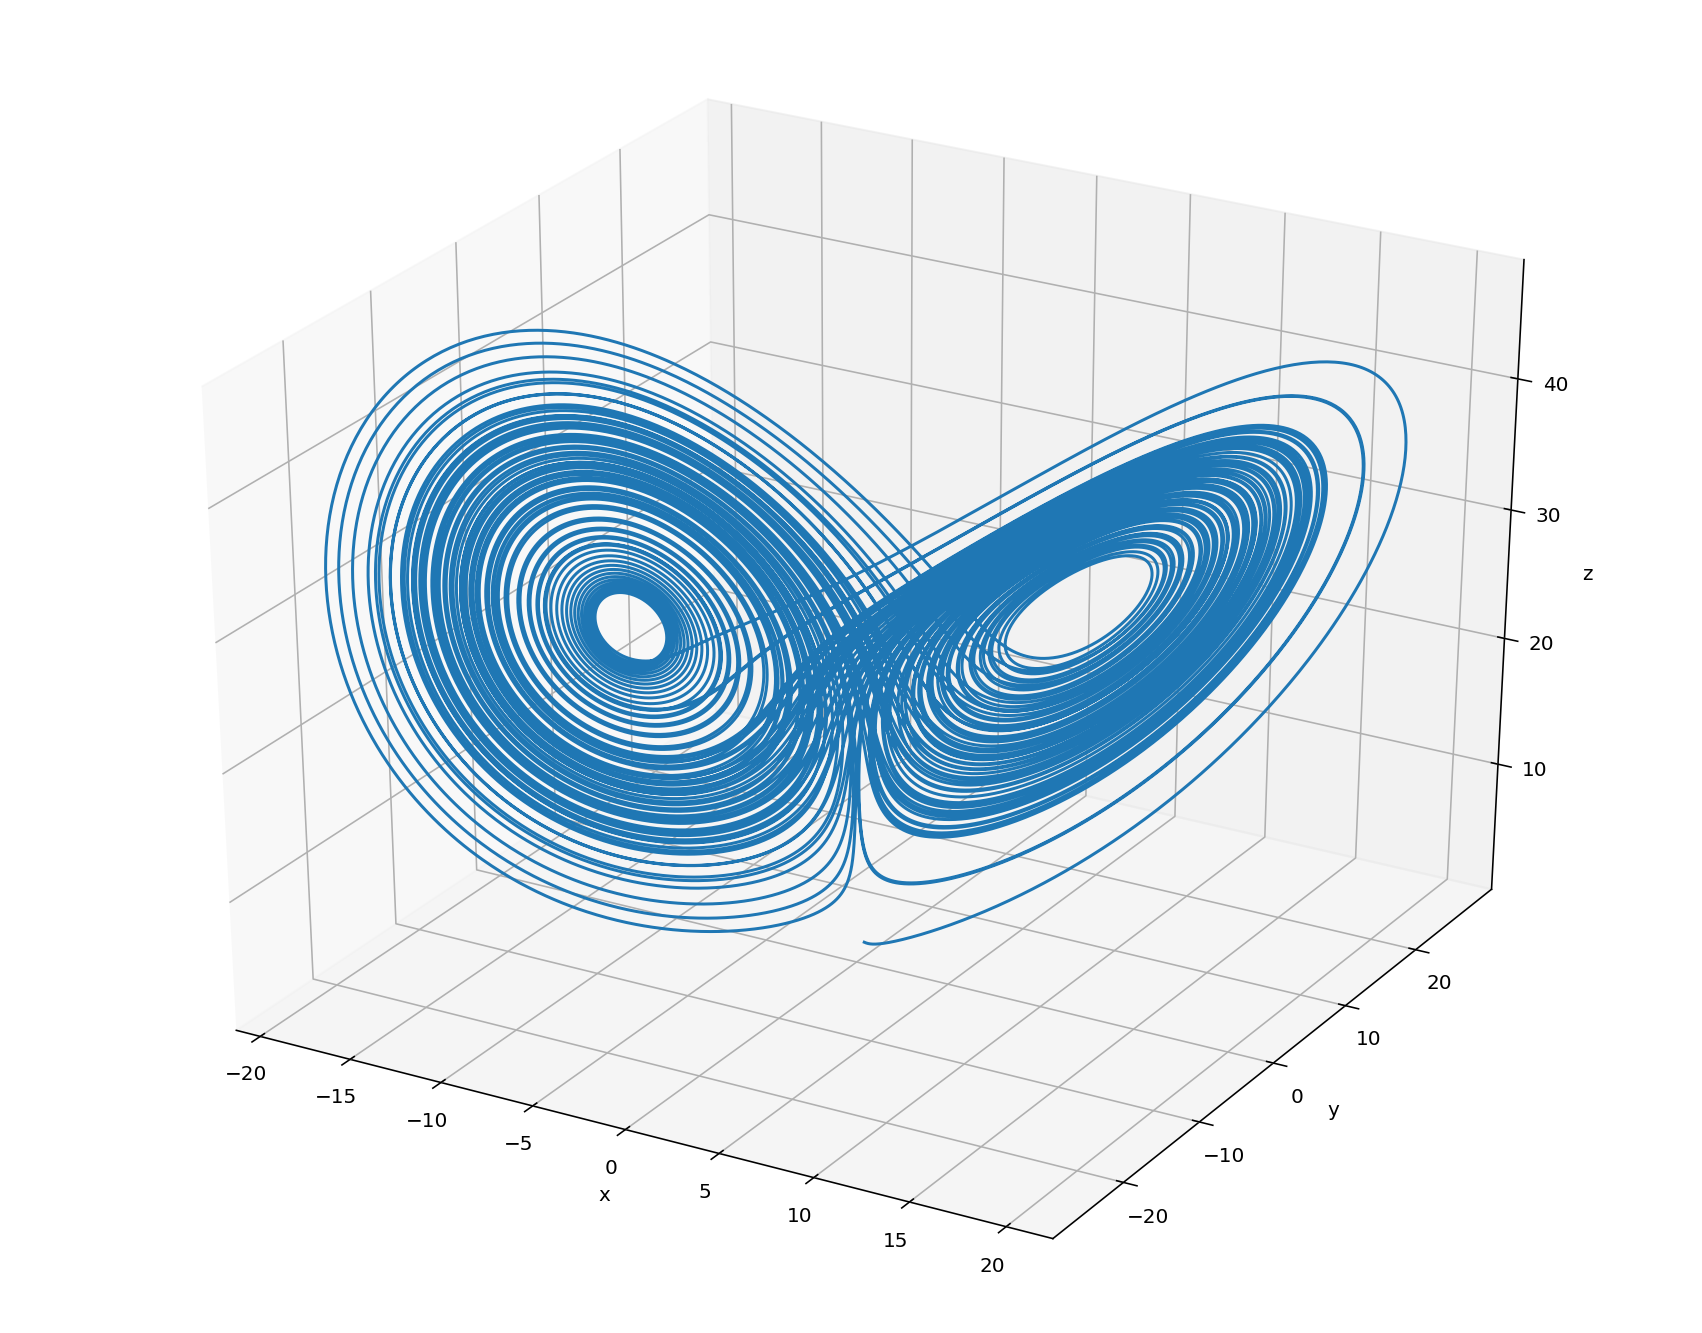

In [94]:
X = (0, 1, 1)
r = 28
ThreeDPlot(X, r, 100000, 100, "Question5.png")

Here we have the full Lorenz Attractor where $r = 28$. This clearly shows chaotic behaviour as the trajectory switches between the two strange attractors.

The $y(t)$ series graph shows:

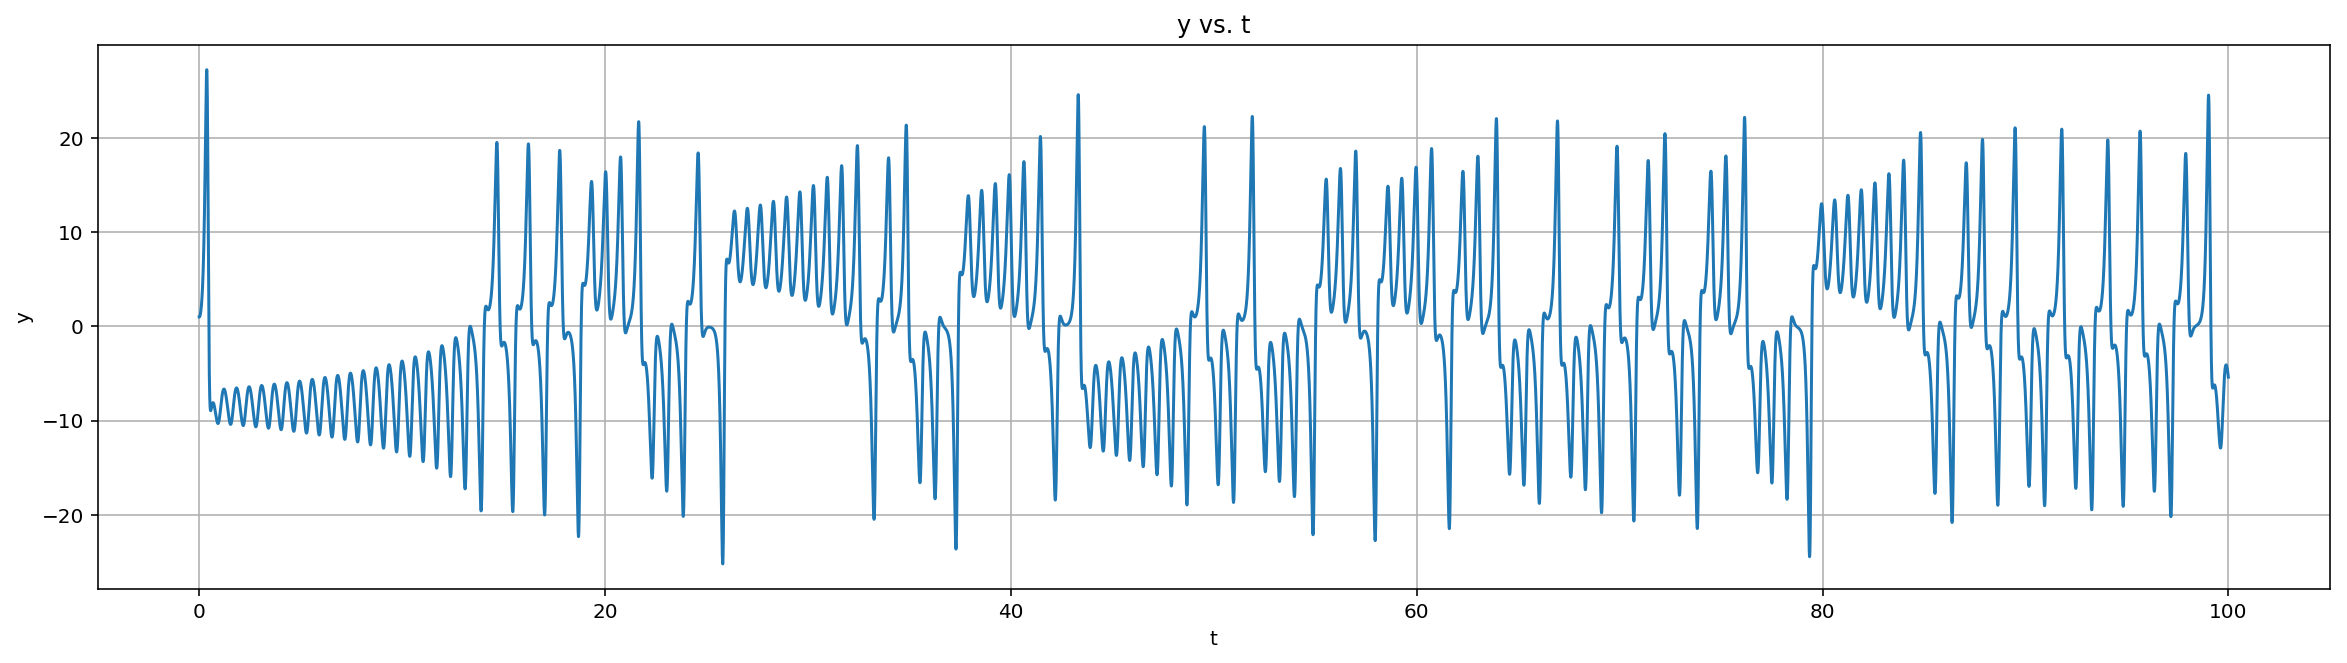

In [95]:
T = LorenzSolver(X, r, 100000, 100)
plt.figure(figsize = (20, 5))
plt.xlabel('t')
plt.ylabel('y')
plt.title('y vs. t')
plt.grid()
plt.plot(T[3], T[1])
plt.savefig("Q5YT.png")

This confirms the chaotic behaviour as there is no periodicity of the time series.

## Question 6
## Lorenz Map (graph of $z_{n+1}$ vs $z_n$ for maximums of $z$)

The Lorenz map given by:
$$z_{n+1} =f(z_n)$$
takes the maximum values of the $z(t)$ series and plots them on a map where the x-axis is a given maximum which maps to the y-axis which corresponds to the next maximum in the series.<br>
This gives the map:

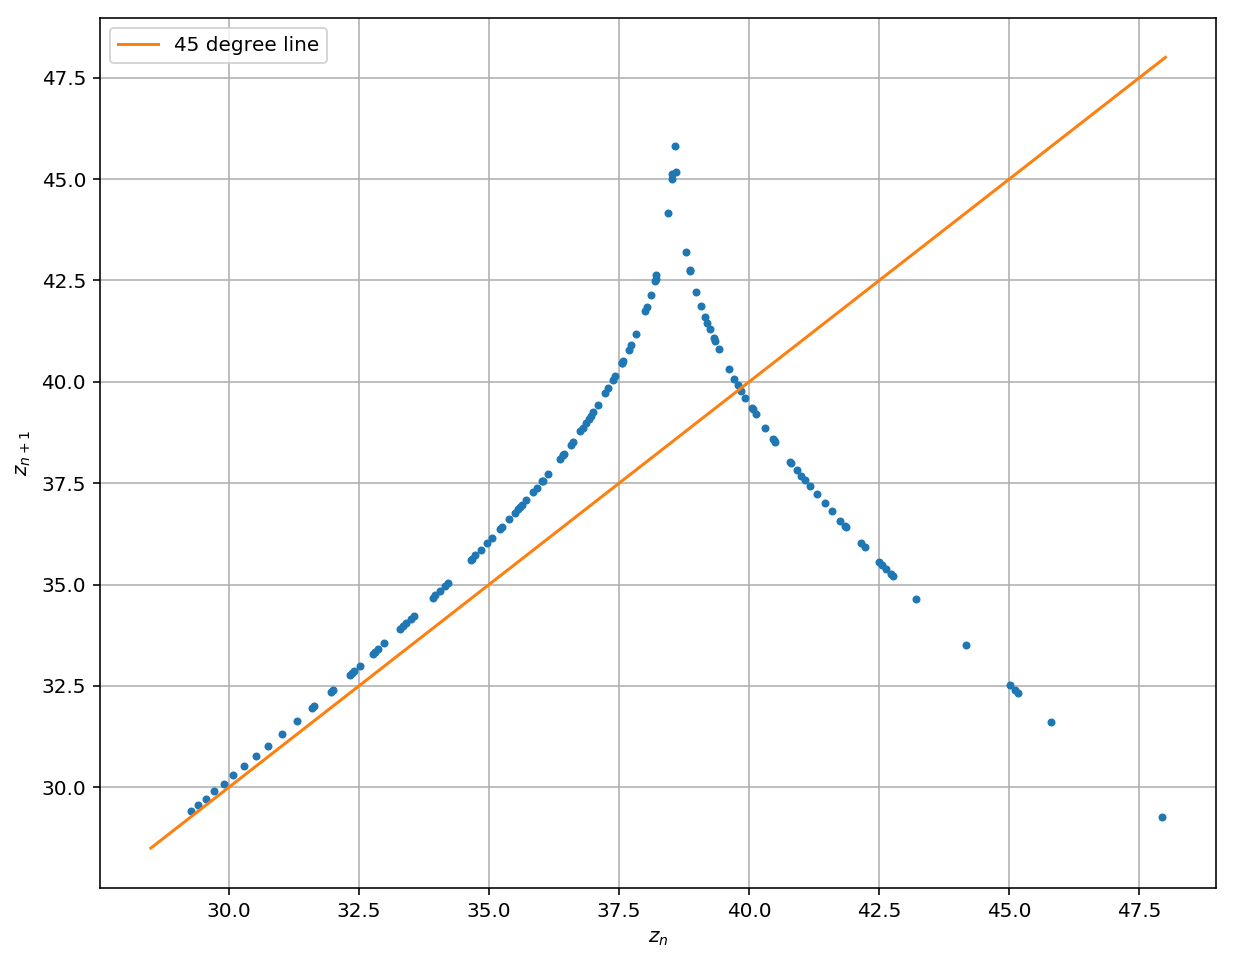

In [96]:
z = T[2]
zn1 = []
zn = []

for i in range(1, len(z)-1, 1):
    if z[i-1]<z[i] and z[i+1]<z[i]: #This is finding a maximum on the graph
        zn.append(z[i])            #by using the basic definition of a turning point. Taken from Connor Goosen's Physics CP3.
        
for i in range(1, len(zn), 1):
    zn1.append(zn[i])

zn.pop(-1) #Honestly don't know why this is here or whether it's important. Don't delete to be safe.
y = np.linspace(28.5, 48, 20)
x = np.linspace(28.5, 48, 20)

plt.figure(figsize=(10, 8))
plt.xlabel(r'$z_n$')
plt.ylabel(r'$z_{n+1}$')
plt.grid()
plt.plot(zn, zn1, marker = '.', linestyle = "none")
plt.plot(x, y, label = '45 degree line')
plt.legend()
plt.savefig("Q6LorenzMap.png")

The map, plotted alongside a $45^{\circ}$ line shows two intersections with the $f(z_{n})$ map. This gives the fixed points of the system.

## Question 7: Lorenz system simulation with $r = 350$

This simulation got rid of the transient of the trajectory, which is the part of the trajectory from the initial condition to the point where the behaviour becomes repetitive. This is valid to do as the transient is a part of the trajectory that is only determined by the initial conditions and does not reflect the governing behaviour of the system.

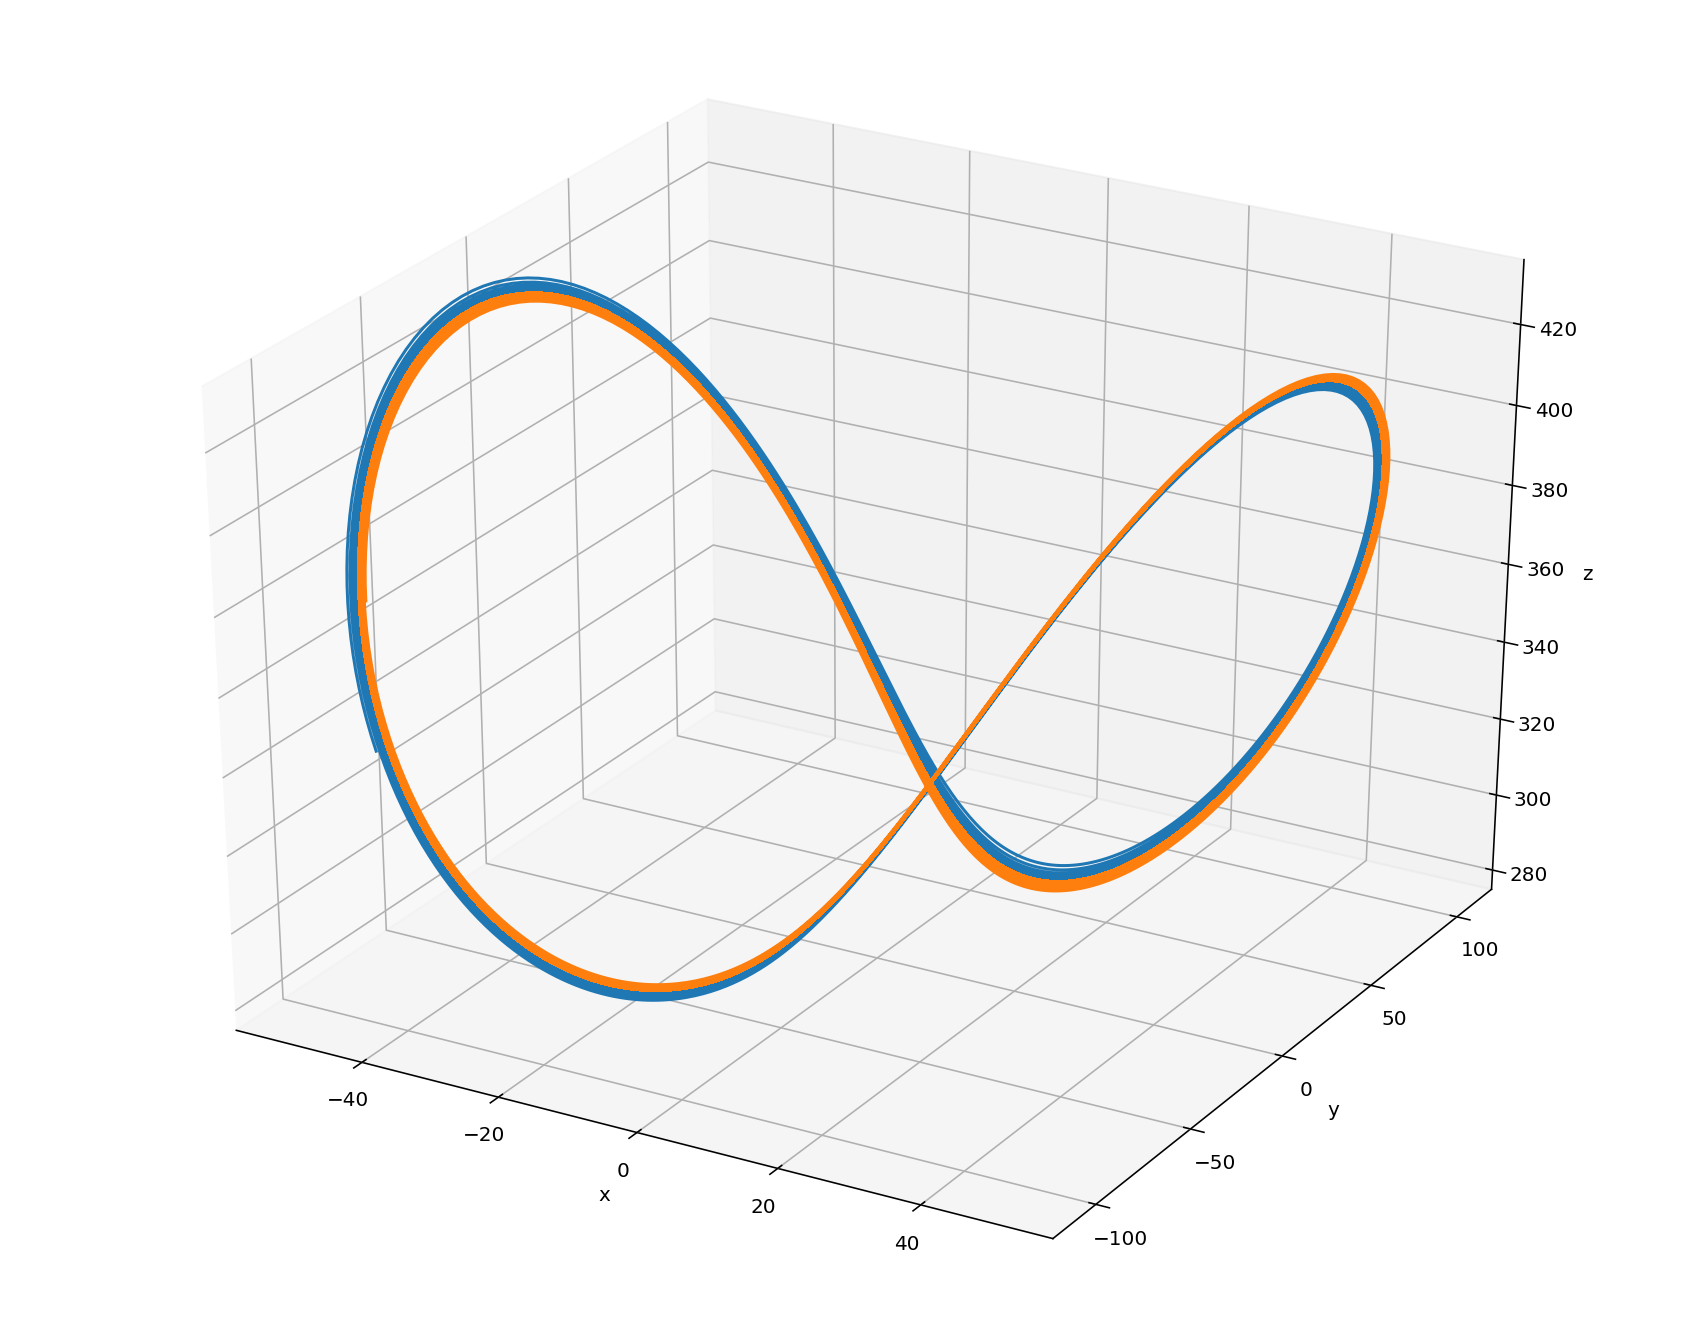

In [107]:
r = 350
X1 = (1,1,1)
X2= (1, -1, -1)
T1 = LorenzSolver(X1, r, 1000000, 1000)
T2 = LorenzSolver(X2, r, 1000000, 1000)

x1, y1, z1, t = T1
x1 = x1[3000:]
y1 = y1[3000:]
z1 = z1[3000:]



x2, y2, z2, t2 = T2
x2 = x2[3000:]
y2 = y2[3000:]
z2 = z2[3000:]

fig = plt.figure(figsize = (15, 12))
ax = fig.gca(projection = '3d') #generates the 3D plot
ax.plot(x1, y1, z1)
ax.plot(x2, y2, z2)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.savefig("Question7.png")
plt.show()


This shows that at this $r$ value, the system becomes periodic.<br>
This can be validated by the $y(t)$:

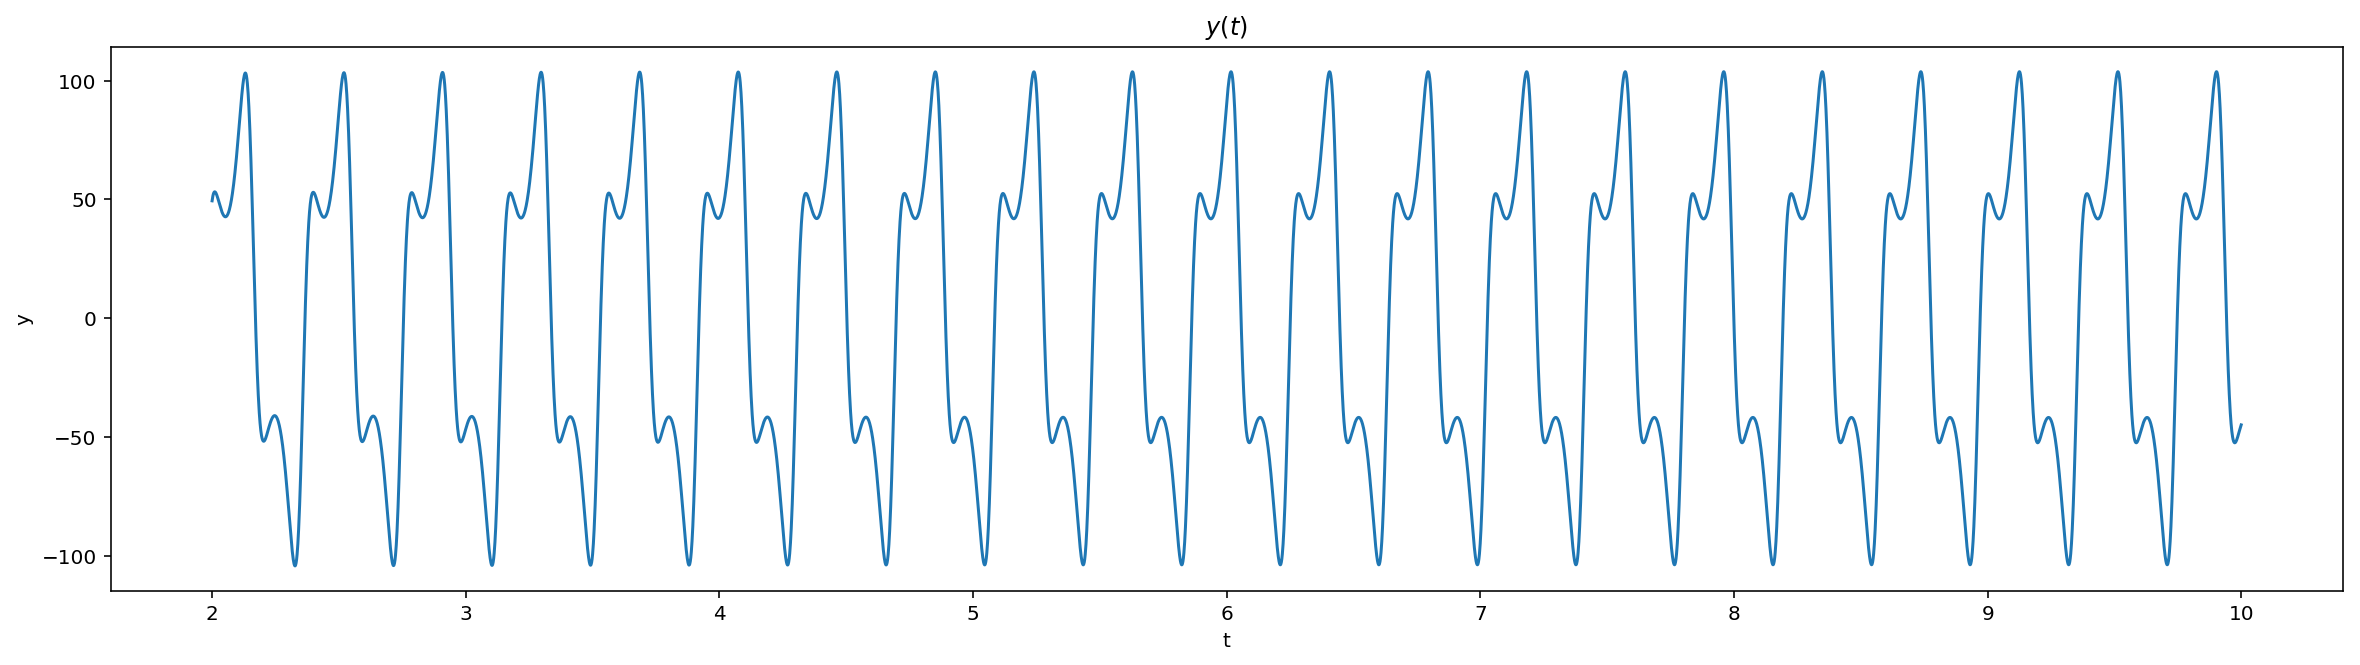

In [109]:
tsamp = t[2000:10000]
ysamp = y1[2000:10000]
plt.figure(figsize = (20, 5))
plt.title(r"$y(t)$")
plt.ylabel("y")
plt.xlabel("t")

plt.plot(tsamp, ysamp)
plt.savefig("Question7YT.png")

Which shows a clear periodicity of the system.

## Question 8

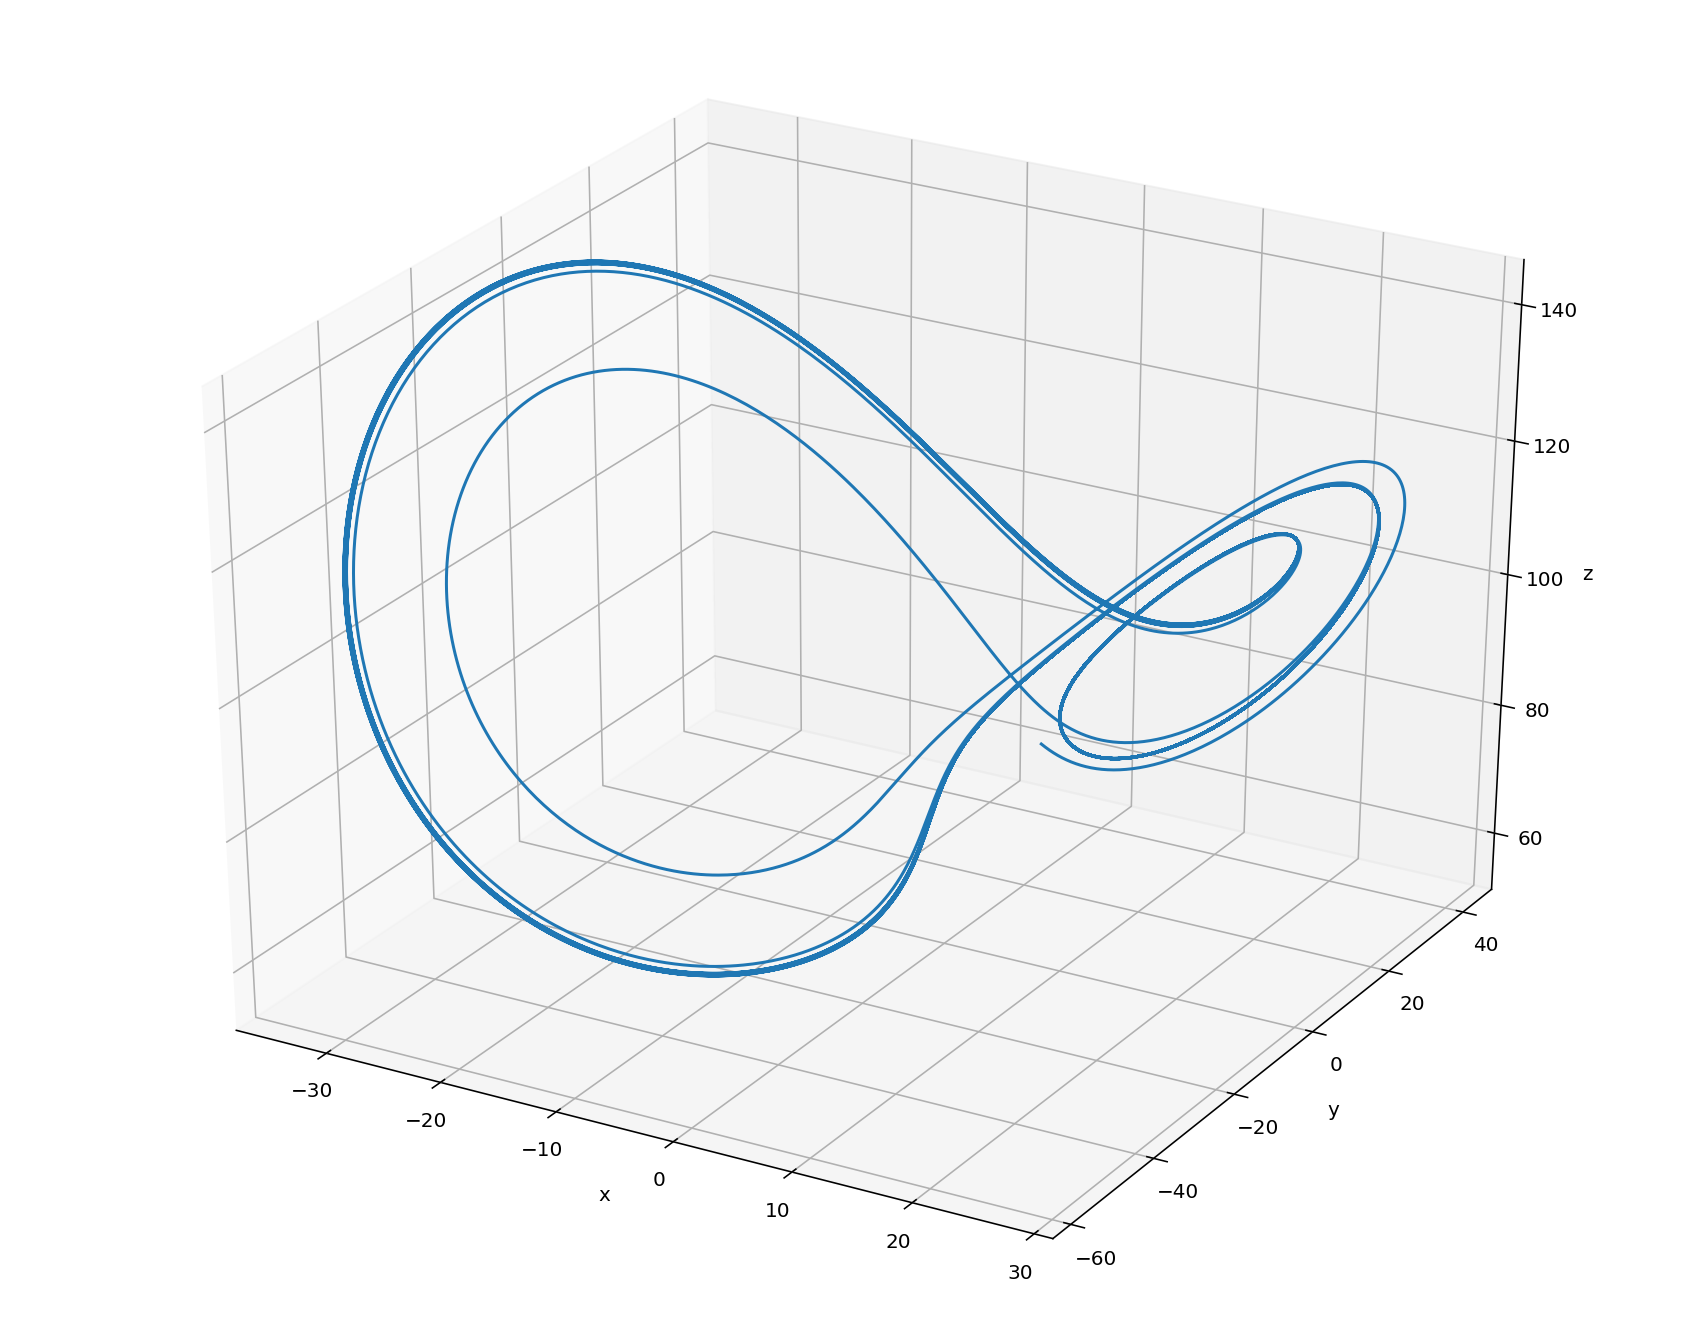

In [102]:
X = (0, 1, 1)
r = 100
T1 = LorenzSolver(X, r, 1000000, 1000)

x1, y1, z1, t = T1
x1 = x1[3000:]
y1 = y1[3000:]
z1 = z1[3000:]

fig = plt.figure(figsize = (15, 12))
ax = fig.gca(projection = '3d') #generates the 3D plot
ax.plot(x1, y1, z1)

plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.savefig("Question81.png")
plt.show()


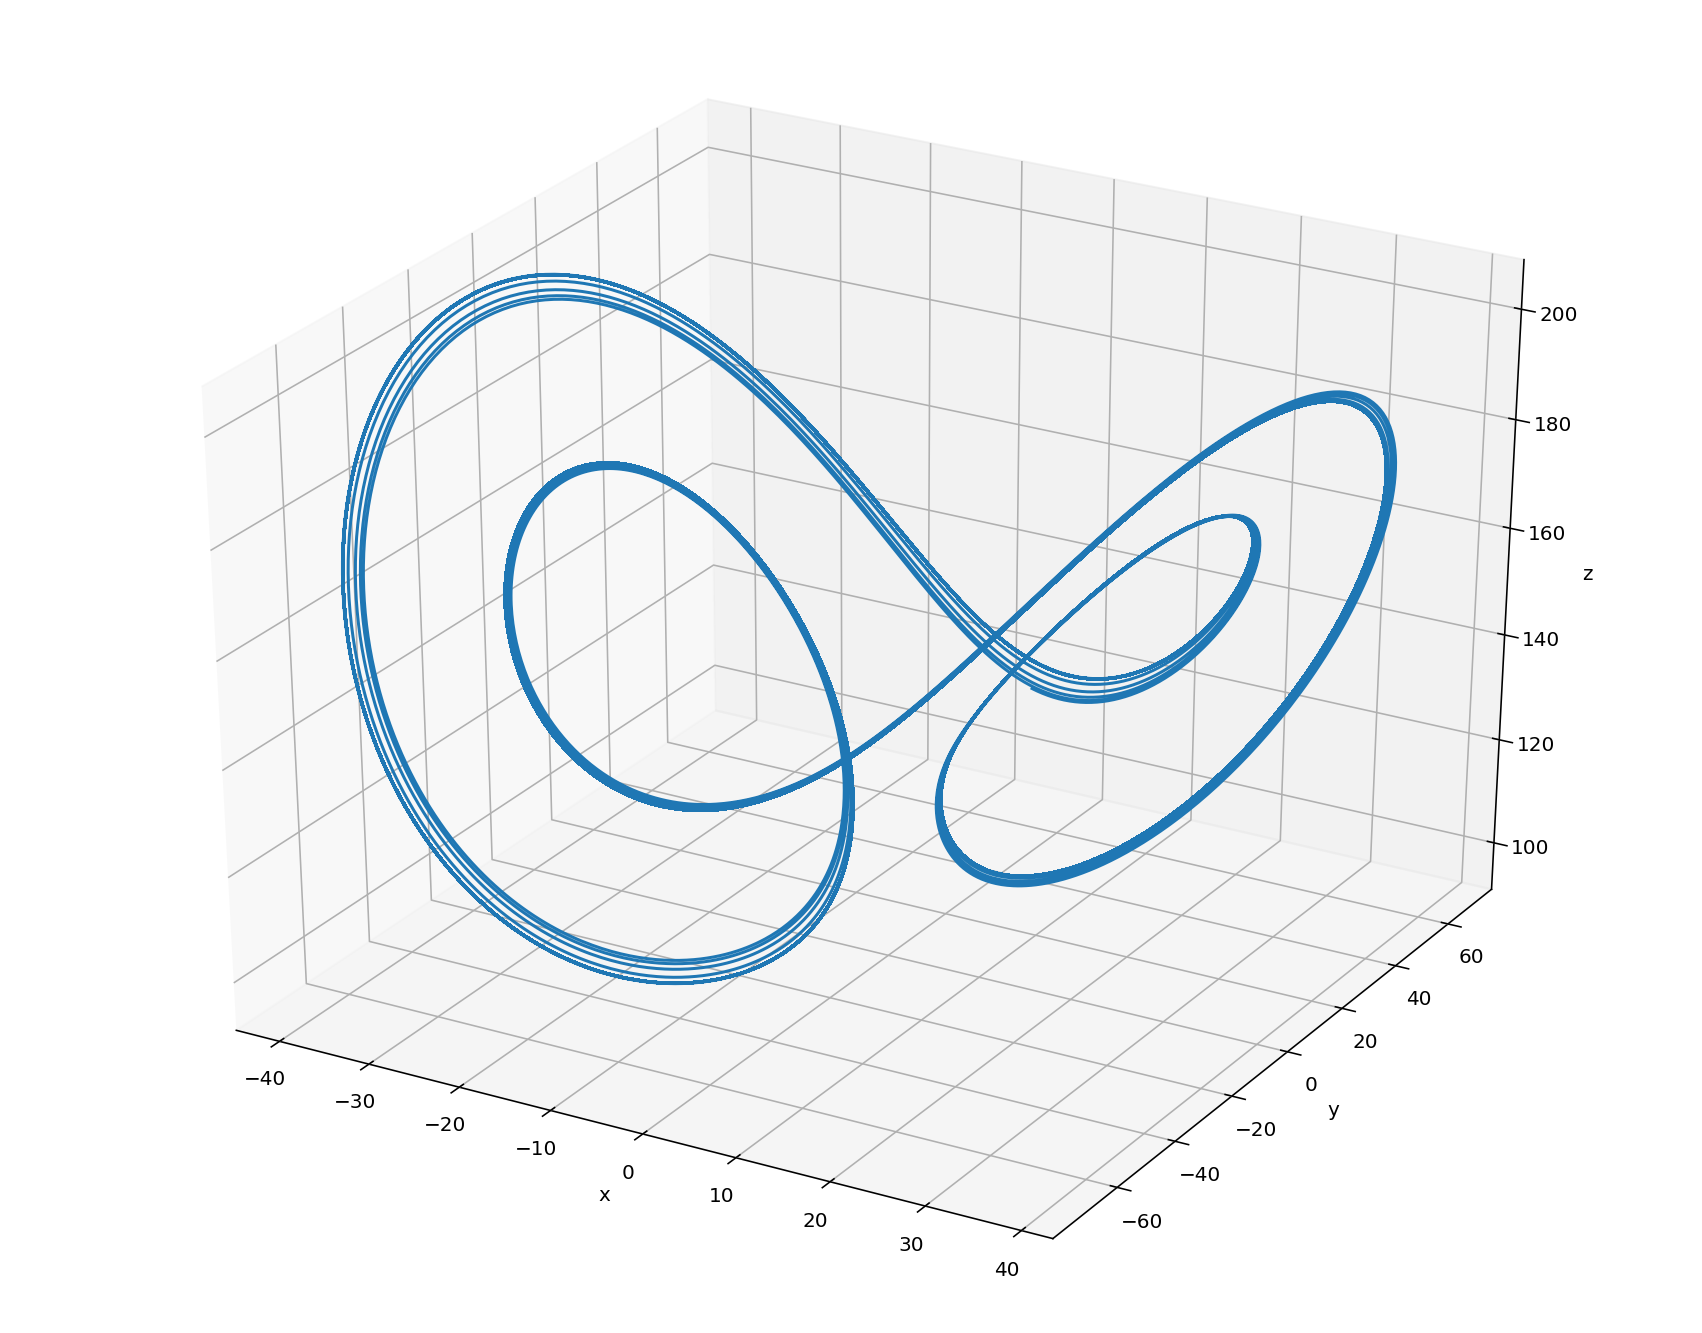

In [103]:
X = (0, 1, 1)
r = 150
T1 = LorenzSolver(X, r, 1000000, 1000)

x1, y1, z1, t = T1
x1 = x1[3000:]
y1 = y1[3000:]
z1 = z1[3000:]


fig = plt.figure(figsize = (15, 12))
ax = fig.gca(projection = '3d') #generates the 3D plot
ax.plot(x1, y1, z1)

plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.savefig("Question82.png")
plt.show()


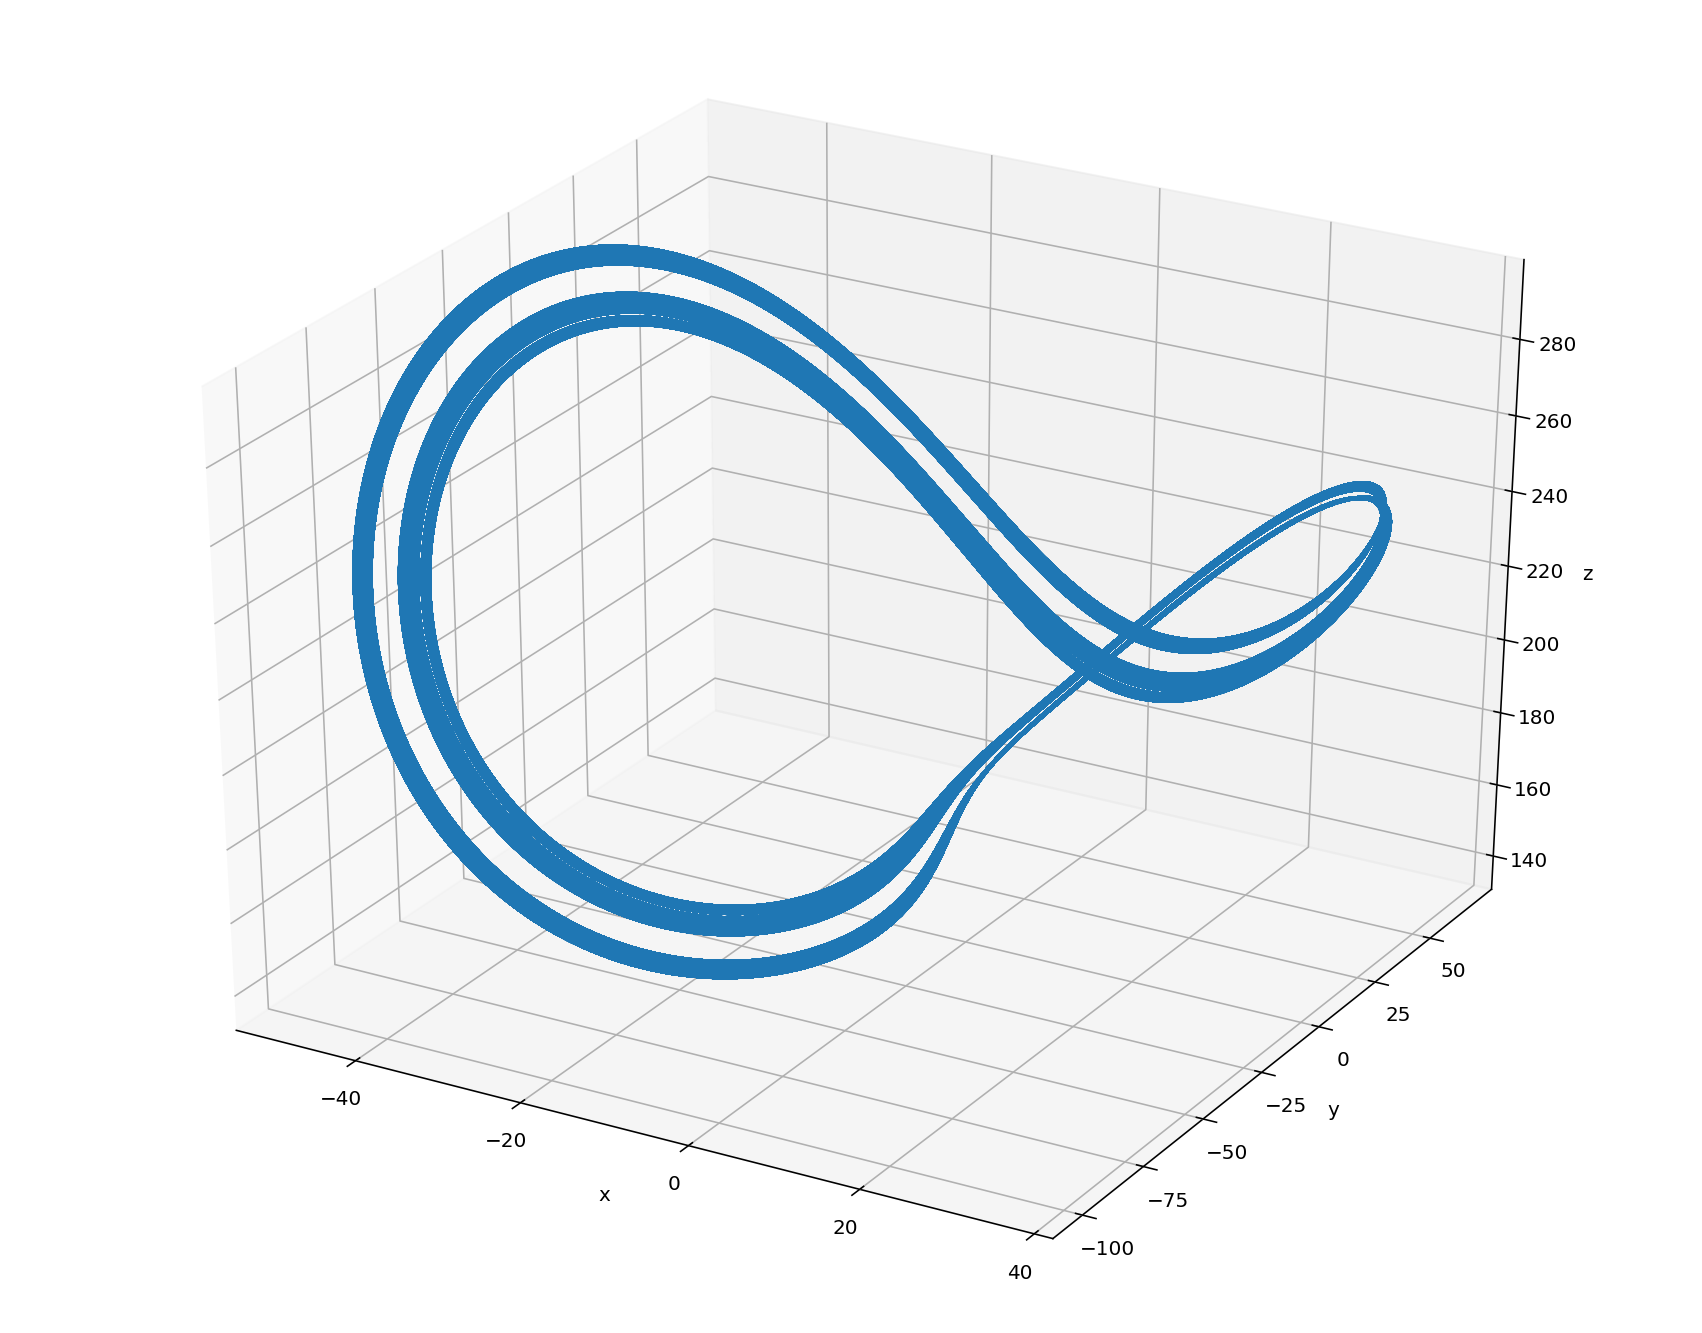

In [104]:
X = (0, 1, 1)
r = 215
T1 = LorenzSolver(X, r, 1000000, 1000)

x1, y1, z1, t = T1
x1 = x1[3000:]
y1 = y1[3000:]
z1 = z1[3000:]


fig = plt.figure(figsize = (15, 12))
ax = fig.gca(projection = '3d') #generates the 3D plot
ax.plot(x1, y1, z1)

plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.savefig("Question83.png")
plt.show()


# Beyond The Project:
I want to explore the system a little more outside of the project requirements.<br>

### Bifurcation Diagram:

In [22]:
def zmax(r):
    S = 10 #sigma
    B = 8/3 #b
    X = (0,1,1)
    
    T = LorenzSolver(X, r, 100000, 100)
    for i in range(0,len(T[0]), 1):
        if T[0][i]> -0.1 and T[0][i]<0.1
        
    return max(T[2])

In [23]:
N=1000
Rr = np.linspace(0, 400, N)
zMax = np.zeros(N)
for i in range(0, 1000, N):
    zMax[i] = zmax(Rr[i])

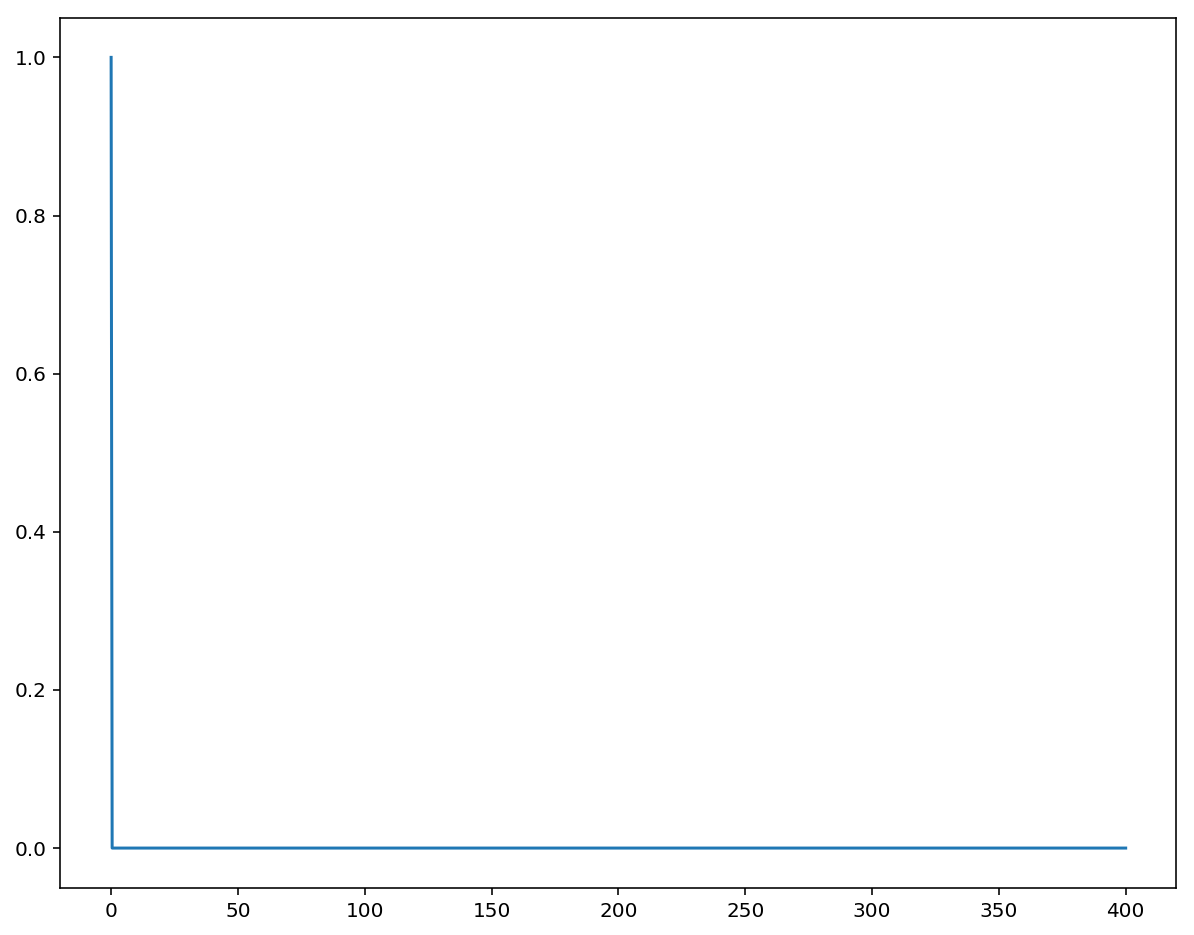

In [27]:
plt.figure(figsize = (10,8))
plt.plot(Rr, zMax)